In [81]:
import task_reader as tr
import os
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def walk_through_files(path, file_extension='.md'):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename.endswith(file_extension):
                yield os.path.join(dirpath, filename)

In [223]:
### We have to make it not exclusive to a particular date
path = "../../Accountability/Dailies/"
dir_list = os.listdir(path)

tasks = []      
for fname in walk_through_files(path):
    date = os.path.basename(fname).split('.')[0]
    task_mode = fname.split('/')[-2]
    print(date)
    note_details = tr.task_features(date, task_mode, fname)
#     print(note_details)
    tasks.append(note_details.copy())


df = pd.DataFrame.from_records(tasks)
df.sort_values('date').head(len(tasks))        

2023-10-02
2023-10-10
2023-10-02
2023-09-16
2023-10-11
2023-10-02
2023-09-16
2023-10-13
2023-10-09
2023-10-10
2023-10-11
2023-10-05
2023-09-15


,date,task_mode,vd,d,n,p,vp,work_time,elapsed_time,breaks,productivity_pulse
12,2023-09-15,Development_Mode,0,130,165,70,0,365,395,1,45.890411
3,2023-09-16,Job_Mode,0,90,0,63,0,153,180,2,45.588235
6,2023-09-16,Development_Mode,0,0,0,46,173,219,260,1,94.748858
0,2023-10-02,Learning_Mode,0,0,69,0,0,69,69,0,50.000000
2,2023-10-02,Job_Mode,40,0,23,0,0,63,63,0,34.126984
5,2023-10-02,Development_Mode,0,0,0,36,0,36,36,0,75.000000
11,2023-10-05,Development_Mode,0,0,41,102,36,179,554,4,74.301676
8,2023-10-09,Development_Mode,32,0,31,24,42,129,374,2,64.728682
1,2023-10-10,Learning_Mode,0,28,0,0,0,28,28,0,25.000000
9,2023-10-10,Development_Mode,0,0,0,46,33,79,140,1,85.443038


<AxesSubplot: xlabel='date'>

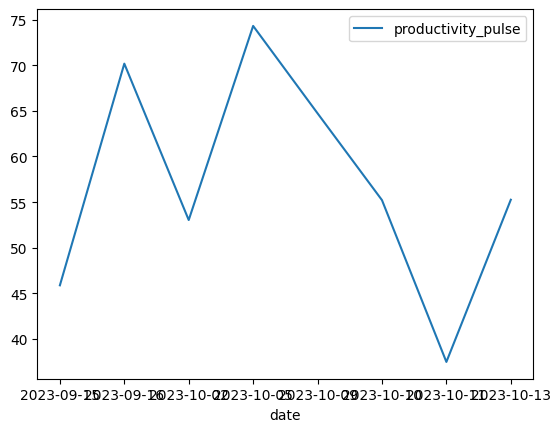

In [224]:
dailies_avg = df.groupby('date').mean(numeric_only=True)
dailies_avg.head()
dailies_avg.plot.line(y='productivity_pulse')
# figs, axs = subplots()
# df['productivity_pulse'].plot.line(ax=)

## Grouping by Date and Graphing Task Progression
Now we have to retrieve the 

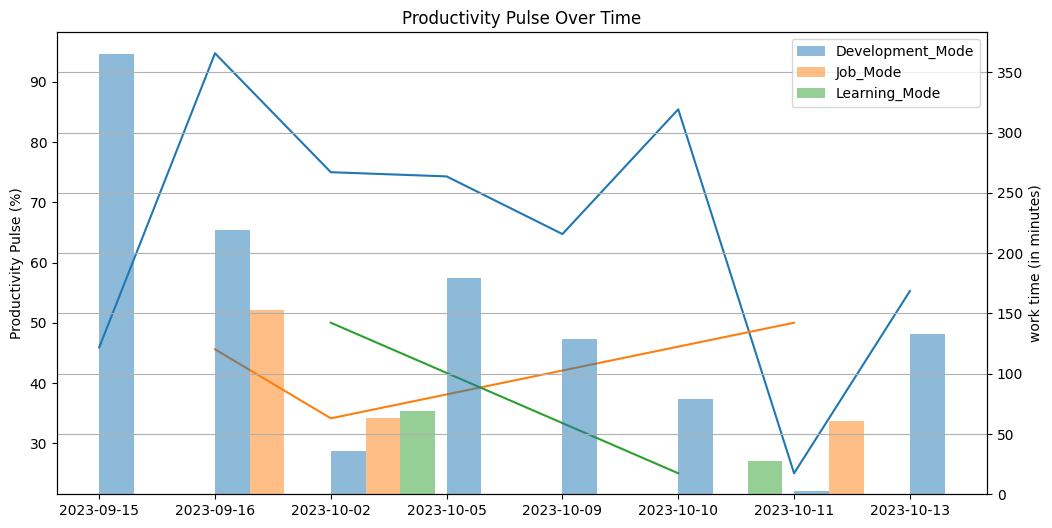

In [227]:
relevant_info = df[['date', 'productivity_pulse', 'task_mode', 'work_time']].sort_values('date')
grouped_ri = relevant_info.groupby('task_mode')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()


# bar graph variables
offset = 0
width = .3

for name, group in grouped_ri:
    group = group #sorting data by date -> sequential
    dates = group['date'] # x axis data
    
    # productivity pulse plot
    productivity_pulse = group['productivity_pulse'] # y axis data
    task_mode = name[0]  # grouped by task so this is naturally the first value in the tuple
    ax1.plot(dates, productivity_pulse, label=name)
    ax1.set_ylabel('Productivity Pulse (%)')
    
    # values for bar indices
    ind = np.array([])
    for d in group['date']:
        donde = np.where(relevant_info['date'].unique() == d)
#         print(donde)
        ind = np.append(ind, donde[0][0])
    
    # work time plot
    ax2.set_ylabel('work time (in minutes)')
    work_time = group['work_time']
    ax2.bar(ind + offset, work_time, alpha=.5, align='edge', width=.3, label=name)
    offset += width
    
plt.xlabel('Date')
plt.title('Productivity Pulse Over Time')
plt.legend(loc='best')
plt.grid(True)

# plt.show()

In [ ]:
'''
When I eventually group by date this will be a useful manager

date_manager = {
    "date": None,
    "notes_analyzed": 0,
    "size": .8
}


curr = name.split("-")[-1]
    if date_manager["date"] != curr:
        date_manager["date"] = curr
        date_manager["notes_analyzed"] = 0
    else:
        date_manager["size"] = date_manager["size"] * .5
'''